In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df= pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
x = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]
#print(y)

In [4]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

#X_train
x_test

array([[-0.09544771, -0.58900572,  0.72247648,  1.5131568 ],
       [ 0.14071157, -1.98401928,  0.10361279, -0.30004108],
       [-0.44968663,  2.66602591, -1.35915595, -1.33615415],
       [ 1.6757469 , -0.35650346,  1.39760052,  0.736072  ],
       [-1.04008484,  0.80600783, -1.30289562, -1.33615415],
       [ 0.49495049,  0.57350557,  1.22881951,  1.64267094],
       [-1.04008484,  1.03851009, -1.41541629, -1.20664002],
       [ 0.96726906,  0.10850105,  0.49743514,  0.34752959],
       [ 1.0853487 , -0.58900572,  0.55369548,  0.21801546],
       [ 0.25879121, -0.58900572,  0.10361279,  0.08850133],
       [ 0.25879121, -1.05401024,  1.00377816,  0.21801546],
       [ 0.61303014,  0.34100331,  0.38491447,  0.34752959],
       [ 0.25879121, -0.58900572,  0.49743514, -0.04101281],
       [ 0.73110978, -0.58900572,  0.4411748 ,  0.34752959],
       [ 0.25879121, -0.35650346,  0.49743514,  0.21801546],
       [-1.15816448,  1.27101235, -1.35915595, -1.46566829],
       [ 0.14071157, -0.

In [6]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
y_pred = classifier.predict(x_test)

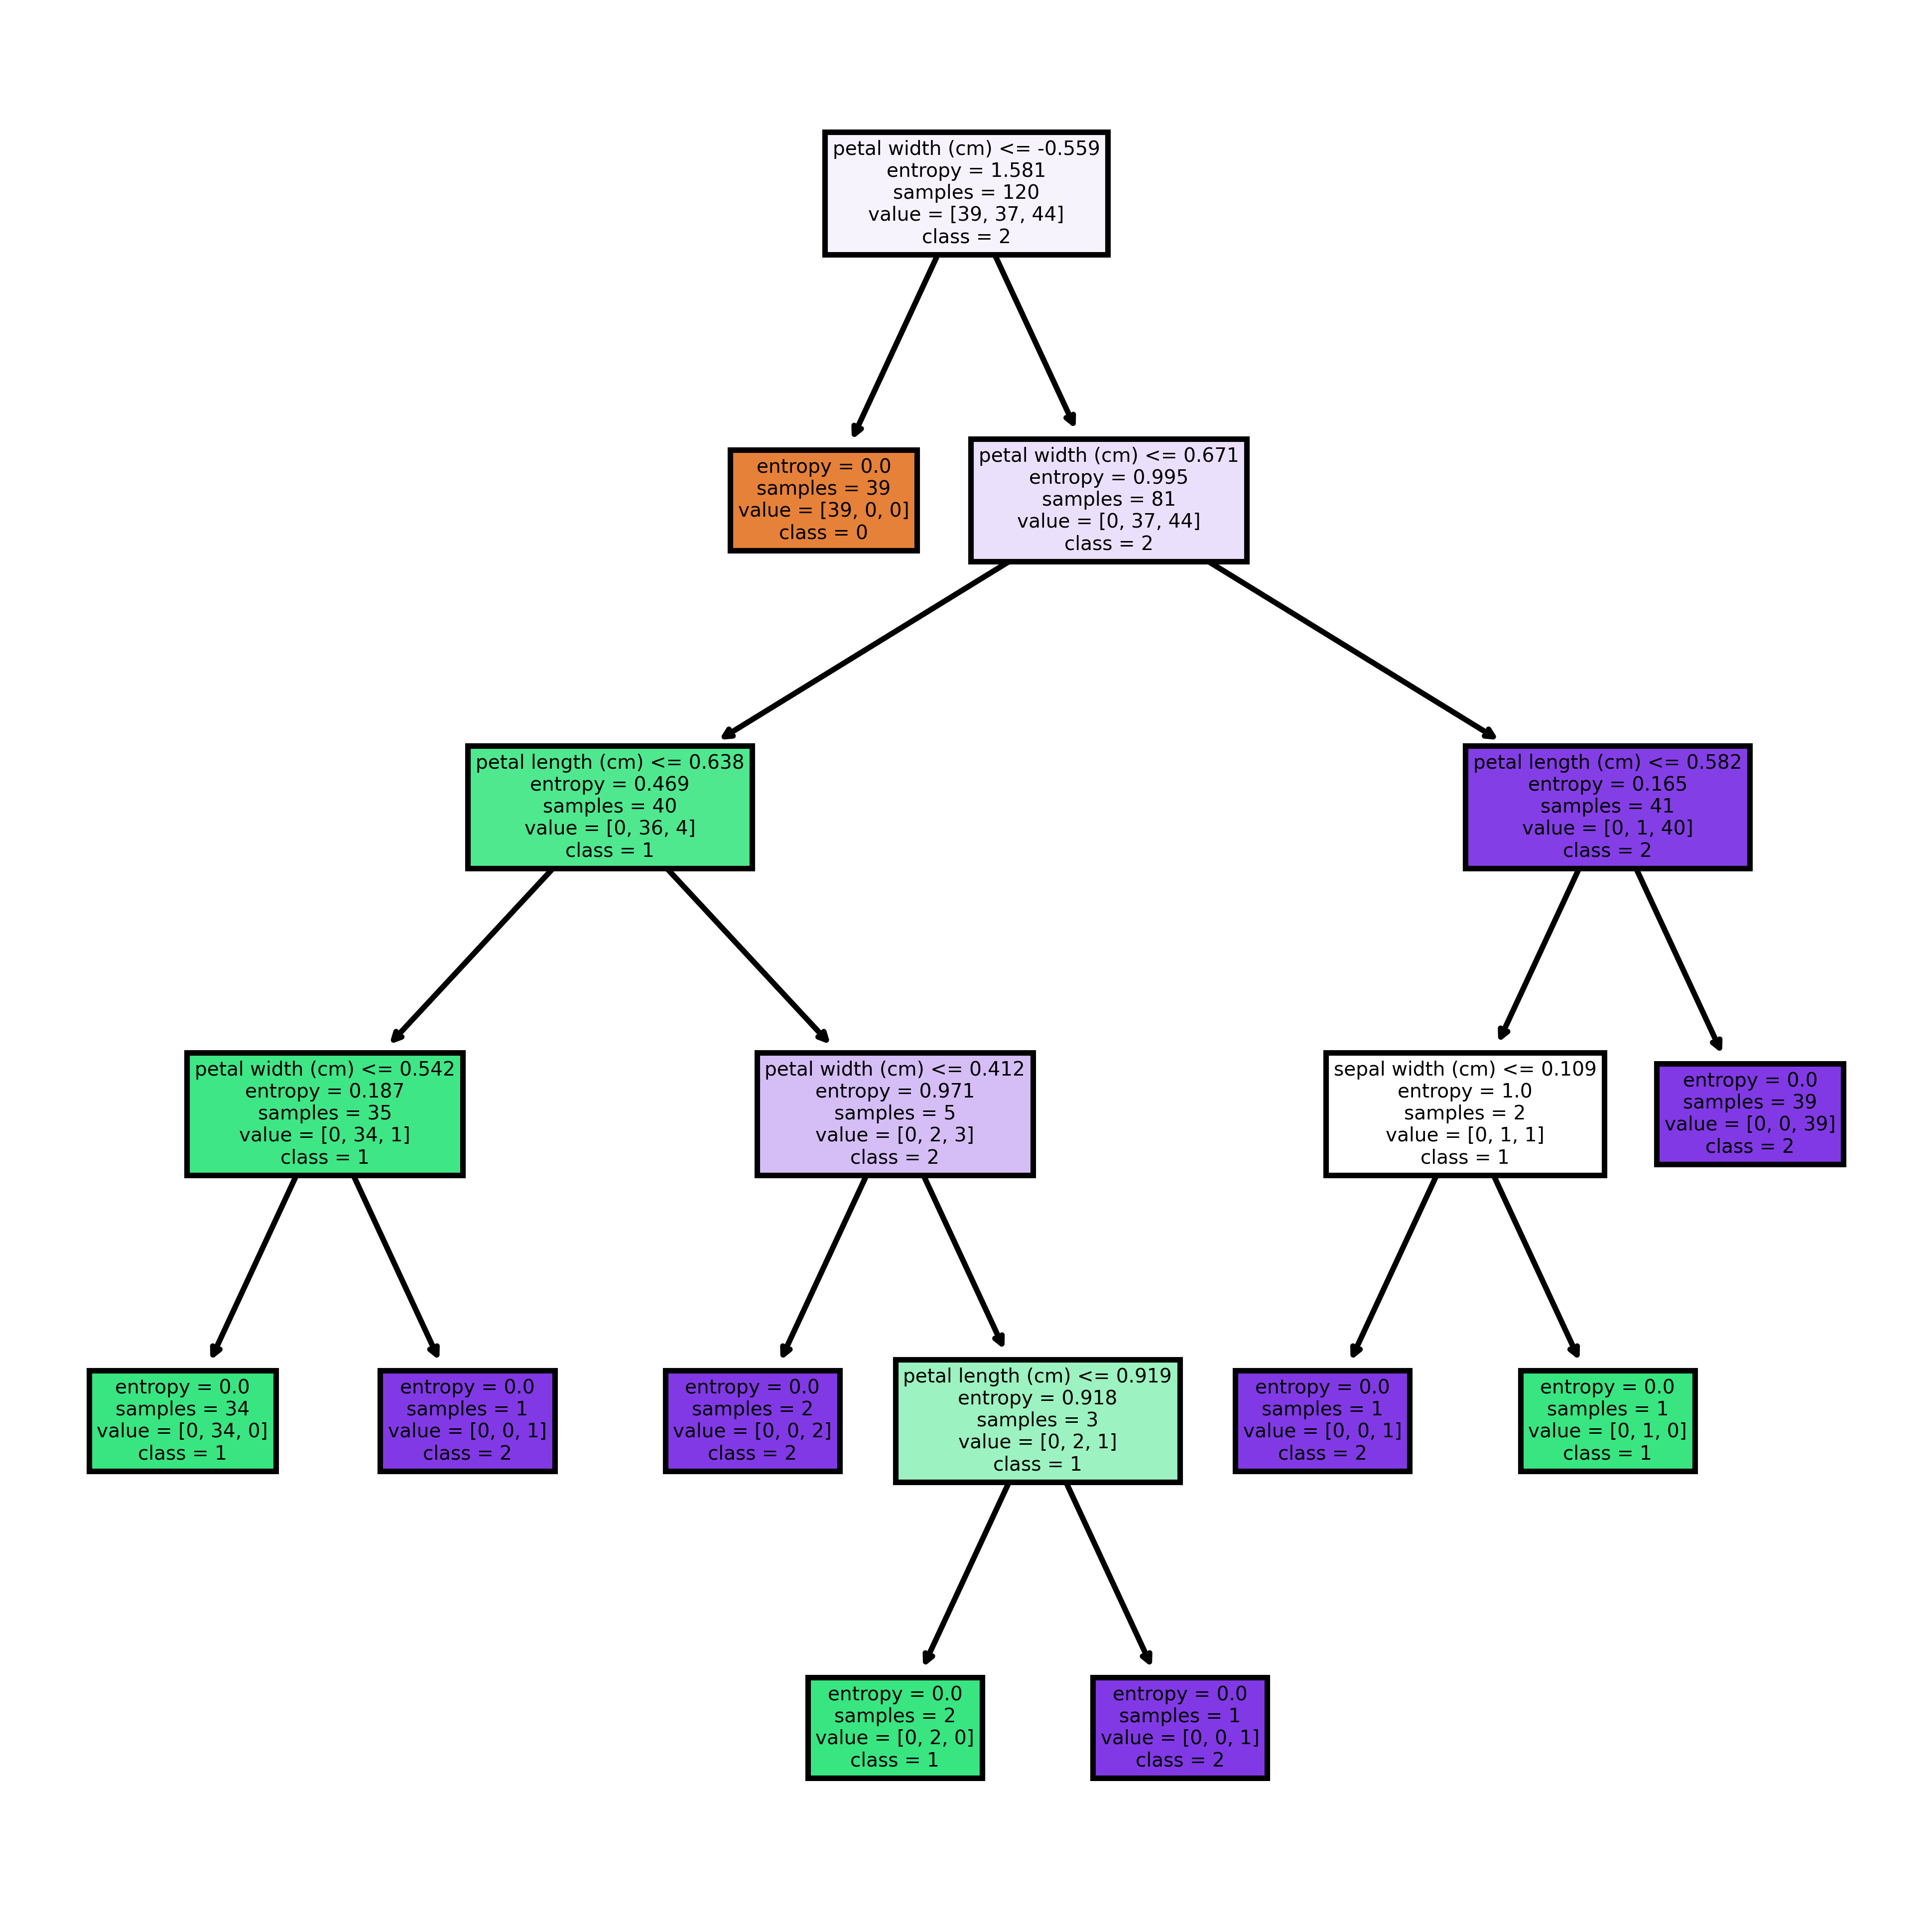

In [8]:
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['0','1','2']
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize = (6,6), dpi= 800)
tree.plot_tree(classifier, feature_names= fn, class_names= cn, filled= True)
fig.savefig("DecisionTree_iris.png")

In [9]:
accuracy_score(y_test, y_pred)

1.0

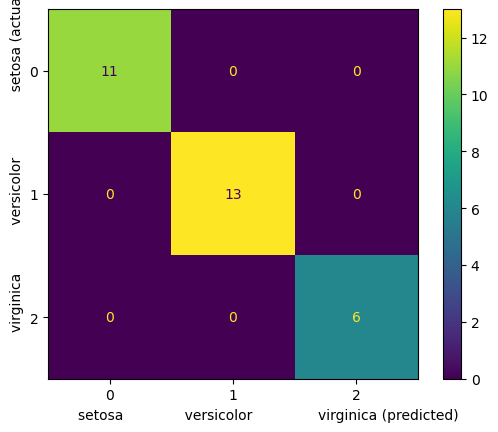

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
CM.from_predictions(y_test, classifier.predict(x_test))
plt.xlabel("                setosa              versicolor               virginica (predicted)")
plt.ylabel("                virginica           versicolor               setosa (actual)")
plt.show()